In [8]:
import geopandas as gpd
import pandas as pd

In [2]:
squares = gpd.read_file("gis_data/Square_Boundaries-shp/")

In [18]:
geom_idx_list = [[idx,geom] for idx, geom in enumerate(squares.unary_union.geoms)]

In [22]:
squares_joined = gpd.GeoDataFrame(pd.DataFrame(geom_idx_list,columns=['index','geometry']),crs="EPSG:4326",geometry='geometry')

In [23]:
squares_joined.to_file("gis_data/squares_joined.geojson", driver="GeoJSON")

In [24]:
#1424
#26
#809

In [28]:
squares_joined.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [29]:
squares_projected = squares_joined.to_crs("EPSG:3582")

In [35]:
squares_projected.shape

(5144, 2)

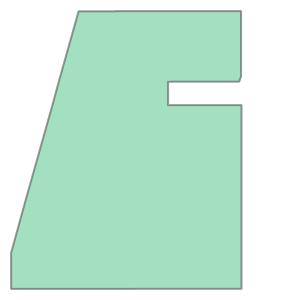

In [31]:
squares_projected.iloc[809].geometry.buffer(1)

In [34]:
len(geom_idx_list_w_buff)

5103

In [32]:
geom_idx_list_w_buff = [[idx,geom] for idx, geom in enumerate(squares_projected.unary_union.buffer(1).geoms)]

In [33]:
squares_joined_w_buff = gpd.GeoDataFrame(pd.DataFrame(geom_idx_list_w_buff
                                                      ,columns=['index','geometry'])
                                         ,crs="EPSG:3582",geometry='geometry')

In [37]:
squares_joined_w_buff.to_crs("EPSG:4326").to_file("gis_data/squares_joined_w_buff.geojson", driver="GeoJSON")